In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/housePrice.csv')
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [5]:
df.isna().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [6]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

In [7]:
df = df.dropna()

In [8]:
df.describe()

,Area,Room,Price,Price(USD)
count,3450.000000,3450.000000,3.450000e+03,3.450000e+03
mean,106.917391,2.081159,5.375563e+09,1.791854e+05
std,69.550976,0.760216,8.125918e+09,2.708639e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.419250e+09,4.730833e+04
50%,90.000000,2.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,6.000000e+09,2.000000e+05
max,929.000000,5.000000,9.240000e+10,3.080000e+06


In [9]:
Q1 = df['Area'].quantile(0.25)
Q3 = df['Area'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['Area'] > lower) & (df['Area'] < upper)]

In [10]:
df.describe()

,Area,Room,Price,Price(USD)
count,3212.000000,3212.000000,3.212000e+03,3.212000e+03
mean,93.233811,1.984122,3.915048e+09,1.305016e+05
std,33.763902,0.658932,3.868330e+09,1.289443e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,67.000000,2.000000,1.300000e+09,4.333333e+04
50%,87.000000,2.000000,2.600000e+09,8.666667e+04
75%,112.000000,2.000000,5.100000e+09,1.700000e+05
max,195.000000,5.000000,3.349000e+10,1.116333e+06


In [11]:
df['Elevator'] = df['Elevator'].map({True: 1, False: 0})
df['Parking'] = df['Parking'].map({True: 1, False: 0})
df['Warehouse'] = df['Warehouse'].map({True: 1, False: 0})

In [12]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60.0,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79.0,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95.0,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33


In [13]:
mean_target = df.groupby('Address')['Price(USD)'].mean()
df['address_encoded'] = df['Address'].map(round(mean_target))

In [15]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),address_encoded
0,63.0,1,1,1,1,Shahran,1.850000e+09,61666.67,99525.0
1,60.0,1,1,1,1,Shahran,1.850000e+09,61666.67,99525.0
2,79.0,2,1,1,1,Pardis,5.500000e+08,18333.33,25927.0
3,95.0,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33,30031.0
4,123.0,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33,359706.0


In [16]:
df = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'address_encoded', 'Price(USD)']]

In [17]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [18]:
x = train[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'address_encoded']]
y = train['Price(USD)']

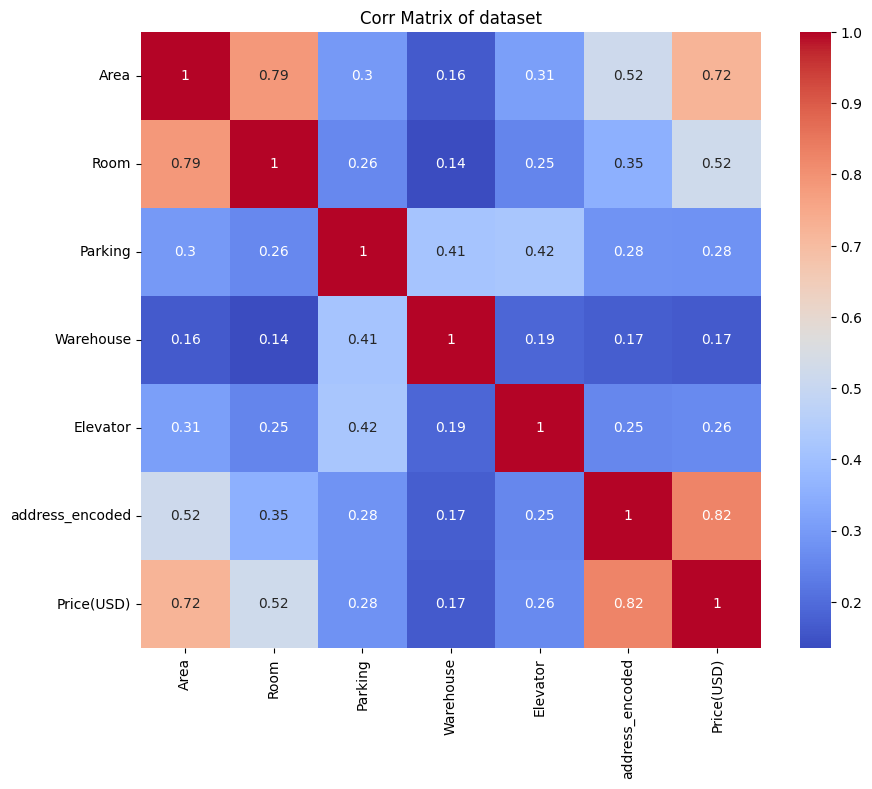

In [19]:
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Corr Matrix of dataset')
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression()
reg.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
testx = test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'address_encoded']]
testy = test['Price(USD)']
pred = reg.predict(testx)

r2_score(testy, pred)

0.8074010943120439